# Visualizing Covid data using FOLIUM library in Python

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno
import folium
from folium import plugins
import numpy as np

In [3]:
covid=pd.read_csv('/../../covid.csv')

In [4]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,259,267,276,284,291,315,328,346,346,346


In [5]:
covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', '7/2/20',
       '7/3/20', '7/4/20', '7/5/20', '7/6/20'],
      dtype='object', length=171)

# Are there any NULL Values in my data

In [6]:
covid.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
7/2/20            False
7/3/20            False
7/4/20            False
7/5/20            False
7/6/20            False
Length: 171, dtype: bool

## How many null values?

In [7]:
covid.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
7/2/20              0
7/3/20              0
7/4/20              0
7/5/20              0
7/6/20              0
Length: 171, dtype: int64

## Can you visualize the nulls?

### As Matrix

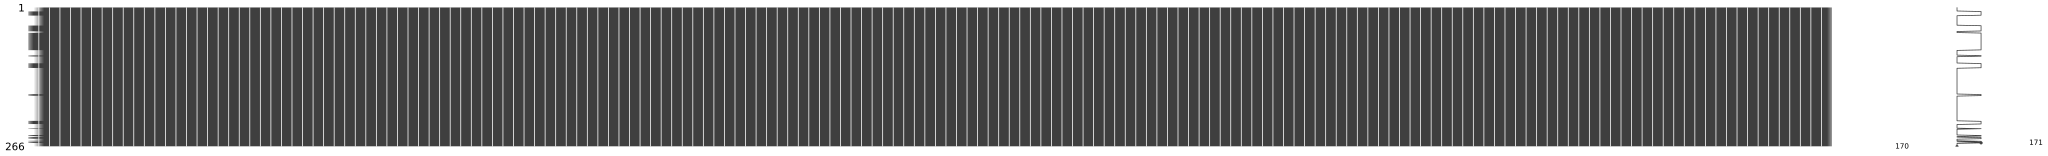

In [8]:
msno.matrix(covid, figsize = (70,5))

### As Bar Graph

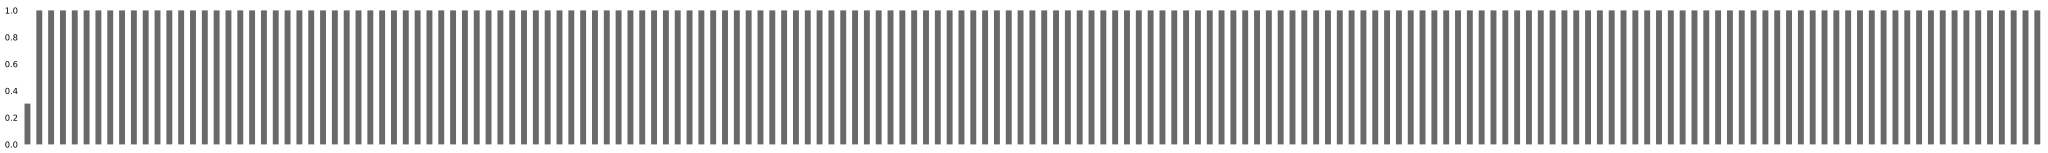

In [9]:
msno.bar(covid, figsize = (70,5))

# How do you deal with the nulls?
## 1) Remove the rows with Nulls
## 2) Drop the whole column
## 3) Replace them with a value

In [10]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,259,267,276,284,291,315,328,346,346,346


In [11]:
covid.drop('Province/State', axis=1, inplace=True)

In [12]:
covid.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,259,267,276,284,291,315,328,346,346,346


# FOLIUM LIBRARY
Folium is a powerful data visualization library in Python that was built to visualize geospatial data. With Folium, you can create a map of any location in the world if its latitude and longitude values are known.

In [13]:
map=folium.Map()
map

# Add lat long

In [16]:
map=folium.Map(location=[29.85,69.78],zoom_start=5,tiles='Stamen Terrain')
map.add_child(folium.LatLngPopup())
map

# Change the terrain

In [27]:
map=folium.Map(zoom_start=5,tiles='Stamen Watercolor')
map.add_child(folium.LatLngPopup())
map

In [28]:
map=folium.Map(zoom_start=5,tiles='Stamen Toner')
map.add_child(folium.LatLngPopup())
map

### Add Measure Controls

In [17]:
map=folium.Map(location=[29.85,69.78],zoom_start=5,tiles='Stamen Terrain')
map.add_child(folium.LatLngPopup())
measure_control=plugins.MeasureControl(position='topleft',active_color='blue',completed_color='blue')
map.add_child(measure_control)
map

## Add Covid data on the global map

In [20]:
map=folium.Map(location=[29.85,69.78],zoom_start=3,tiles='Stamen Terrain')
covid.apply(lambda row:folium.CircleMarker(location=[row['Lat'],row['Long']],radius=5,color='blue',fill=True,fill_color='blue').add_to(map),axis=1)
map

## Add your home marker

In [23]:
map=folium.Map(location=[29.85,69.78],zoom_start=5,tiles='Stamen Terrain')
covid.apply(lambda row:folium.CircleMarker(location=[row['Lat'],row['Long']],radius=5,color='crimson',fill=True,fill_color='crimson').add_to(map),axis=1)
folium.Marker(location=[29.8542,69.7822],icon=folium.Icon(icon='glyphicon-home')).add_to(map)
map